In [153]:
import pandas as pd
import numpy as np
import time
import random as rn
import matplotlib.pyplot as plt

#pd.set_option("display.max_rows",1001)




In [2]:
df_C_Base = pd.read_csv("Cards.csv")

In [202]:
#df_C_Base.sample(frac=1).reset_index(drop=True)

In [4]:
df_C_Base.head()

,Face,N_Face,Suit,Value,Cvalue
0,A,14,H,11,-1
1,K,10,H,10,-1
2,Q,10,H,10,-1
3,J,10,H,10,-1
4,T,10,H,10,-1


In [41]:
def deck_gen_t1 (N_decks, df_C_Base):
    N_decks = float(N_decks)
    df_deck_ = pd.DataFrame()
    len1 = len(df_C_Base)
    N_rnup = np.ceil(N_decks)
    Rat = float(N_decks)/float(N_rnup)
    N_ent = Rat * (N_rnup * len1)
    for n1 in range(0,int(N_rnup)):
        df_di = df_C_Base
        df_di["Deck"] = n1
        df_deck_ = pd.concat([df_deck_,df_di])
    
    df_deck__ = df_deck_.sample(frac=1).reset_index(drop=True)
    df_deck = df_deck__.iloc[0:int(np.round(N_ent))]
    return df_deck
    

In [42]:
def Cnt_upd (Cds_i,Cnt_run,D_size):
    #Count update
    Cnt_i = sum(Cds_i["Cvalue"])
    Cnt_run_new = Cnt_run + Cnt_i
    P_cnt = float(Cnt_run_new) / float(D_size)
    D_size_new = D_size - len(Cds_i)
    return Cnt_run_new, P_cnt, D_size_new
    

In [43]:
def hand_val (hand):
    hand_val = sum(hand["Value"])
    return hand_val

In [44]:
def deal_out (df_deck, N_players):
    N_cards = 2 * (N_players + 1)
    df_hands = df_deck.iloc[0:N_cards]
    df_hands["Player"] = ""
    df_hands.loc[0:1,"Player"] = "Dealer"
    for n1 in range(0,N_players):
        df_hands.loc[(n1+1)*2:((n1+2)*2)-1,"Player"] = "P" + str(n1 + 1)

    df_deck_new = df_deck.drop(range(0,N_cards)).reset_index(drop=True)
    return df_hands, df_deck_new

In [45]:
def Value (df_hand):
    val = sum(df_hand["Value"])
    if ((val > 21) & (14 in np.array(df_hand["N_Face"]))):
        val = val - 10
    return val

def Value_HS (df_hand):
    val = sum(df_hand["Value"])
    HS_type = "Hard"
    if ((val > 21) & (14 in np.array(df_hand["N_Face"]))):
        val = val - 10
    elif ((val <= 21) & (14 in np.array(df_hand["N_Face"]))):
        HS_type ="Soft"
    return val, HS_type

def Value_HS (df_hand):
    val = sum(df_hand["Value"])
    HS_type = "Hard"
    if ((val > 21) & (14 in np.array(df_hand["N_Face"]))):
        val = val - 10
    elif ((val <= 21) & (14 in np.array(df_hand["N_Face"]))):
        "Soft"
    return val, HS_type

In [46]:
def Q_learn_v1(state,Q,act_i,rew):
    qi = Q[state]
    p_rew = np.float(Q[state][act_i][0])
    p_cnt = np.float(Q[state][act_i][1])
    n_cnt = p_cnt + 1.0
    n_rew = ((p_rew * p_cnt) + rew) / (n_cnt)
    arr_i = [n_rew, n_cnt]
    qi.update({act_i:arr_i})
    Q.update({state:qi})
    return Q
    
    

In [47]:
df_BSp = pd.read_csv("BS_Pair.csv")
df_BSv = pd.read_csv("BS_Value.csv")

In [48]:
def reward (value):
    val = np.float(value)
    if val > 21:
        rew = -30
    elif val <= 21:
        rew = (1.0 / (23.0 - val)) * 20
    else:
        print "Reward Error"
        
    return rew

In [49]:
def act_Q(state,Q,p_act):
    try:
        Q[state]
    except:
        q_i = {}
        for a_i in p_act:
            q_i.update({a_i:[0,0]})
        Q.update({state:q_i})  
    
    max_rQ = -100
    for a_i in p_act:
        rQ_val = Q[state][a_i][0]
        if rQ_val > max_rQ:
            act_i = a_i
            max_rQ = rQ_val
    
    return Q, act_i

In [50]:
def act_Q_Mutate(state,Q,p_act):
    try:
        Q[state]
    except:
        q_i = {}
        for a_i in p_act:
            q_i.update({a_i:[0,0]})
        Q.update({state:q_i})  

    
    max_rQ = -100
    for a_i in p_act:
        rQ_val = Q[state][a_i][0]
        if rQ_val > max_rQ:
            act_i = a_i
            max_rQ = rQ_val
    
    if rn.random() > 0.95:
        p_act2 = [x for x in p_act if x != act_i]
        act_i = p_act2[rn.randint(0,len(p_act2)-1)]
        
    
    return Q, act_i

def act_Q_Mutate_BS(state,Q,p_act):
    try:
        Q[state]
    except:
        P_act = ['H','S']
        G_rew = 15.0
        B_rew = -15.0
        N_add = 7.0
        
        st_i = state
        DC_i = st_i[2]
        if DC_i == 11:
            DC_i = 14
        Act_i = BS_St_val(st_i[0],st_i[1],DC_i,df_BSv)
        qi = {}
        for act_i in P_act:
            if act_i == Act_i:
                qi.update({act_i:[G_rew,N_add]})

            else:
                qi.update({act_i:[B_rew,N_add]})
        Q.update({st_i:qi})

    
    max_rQ = -100
    for a_i in p_act:
        rQ_val = Q[state][a_i][0]
        if rQ_val > max_rQ:
            act_i = a_i
            max_rQ = rQ_val
    
    if rn.random() > 0.95:
        p_act2 = [x for x in p_act if x != act_i]
        act_i = p_act2[rn.randint(0,len(p_act2)-1)]
        
    
    return Q, act_i

def act_Q_local(state,Q,p_act,player):
    local_Q = {}
    try:
        Q[state]
    except:
        q_i = {}
        for a_i in p_act:
            q_i.update({a_i:[0,0]})
        Q.update({state:q_i})  
    
    max_rQ = -100
    for a_i in p_act:
        rQ_val = Q[state][a_i][0]
        if rQ_val > max_rQ:
            act_i = a_i
            max_rQ = rQ_val
    
    return Q, act_i

In [51]:
#def BS_FH (df_i, DC_i, df_BSv, df_BSp):
#    #Pair present?


def BS_St (df_i, DC_i, df_BSv):        
    Val, H_S = Value_HS(df_i)
    
    Acter = df_BSv.loc[(df_BSv["P_Val"] == Val) & (df_BSv["H_S"] == H_S) & (df_BSv["D_C"] == DC_i["N_Face"]),"Action"].reset_index(drop=True)
    Act_i = Acter.iloc[0]
    return Act_i


def BS_St_val (Val, H_S, DC_i, df_BSv):
    Acter = df_BSv.loc[(df_BSv["P_Val"] == Val) & (df_BSv["H_S"] == H_S) & (df_BSv["D_C"] == DC_i),"Action"].reset_index(drop=True)
    Act_i = Acter.iloc[0]
    return Act_i

In [52]:
def Act_H (df_h_i, P_i, df_deck):
    row_i = df_deck.iloc[0:1]
    row_i["Player"] = P_i
    df_h_i_new = pd.concat([df_h_i,row_i]).reset_index(drop=True)
    df_deck_new = df_deck.drop(0).reset_index(drop=True)
    return df_h_i_new, df_deck_new




def Act (Act_i, df_h_i, P_i, df_deck):
    if Act_i == "H":
        df_h_i, df_deck = Act_H (df_h_i, P_i, df_deck)
        DD_ratio = 1; Status = "Playing"
    elif Act_i == "S":
        DD_ratio = 1; Status = "Stick"
    elif Act_i == "P":
        print "Split!?!"
    elif Act_i == "Dh":
        df_h_i, df_deck = Act_H (df_h_i, P_i, df_deck)
        Status = "Playing"; DD_ratio = 2
    elif Act_i == "Ds":
        Status = "Stick"; DD_ratio = 2
        
    return df_h_i, df_deck, Status

In [53]:
def track_Q (state,P_i,act,rew,local_Q):
    lq = len(local_Q)
    local_Q.update({lq:{P_i:{state:{act:rew}}}})
    return local_Q

In [54]:
def Q_learn_post_dealer (Q,local_Q,df_Stat):
    df_Stat["Outcome"] = ""
    df_Stat.loc[df_Stat["Status"]=="Bust","Outcome"] = "Dealer"
    df_Stat.loc[(df_Stat["Status"]=="Stick")&(df_Stat["Dealer_Score"]>21),"Outcome"] = "Player"
    df_Stat.loc[(df_Stat["Status"]=="Stick")&(df_Stat["Dealer_Score"]<22)&(df_Stat["Dealer_Score"] < df_Stat["Value"]),"Outcome"] = "Player"
    df_Stat.loc[(df_Stat["Status"]=="Stick")&(df_Stat["Dealer_Score"]<22)&(df_Stat["Dealer_Score"] >= df_Stat["Value"]),"Outcome"] = "Dealer"

    
    

In [55]:
def Q_learn_PD_v1 (df_Stat,local_Q):
    df_Stat["Outcome"] = 0
    df_Stat.loc[df_Stat["Status"]=="Bust","Rew"] = -15
    df_Stat.loc[(df_Stat["Status"]=="Stick")&(df_Stat["Dealer_Score"]>21),"Rew"] = 15
    df_Stat.loc[(df_Stat["Status"]=="Stick")&(df_Stat["Dealer_Score"]<22)&(df_Stat["Dealer_Score"] < df_Stat["Value"]),"Rew"] = 15
    df_Stat.loc[(df_Stat["Status"]=="Stick")&(df_Stat["Dealer_Score"]<22)&(df_Stat["Dealer_Score"] >= df_Stat["Value"]),"Rew"] = -15

    for n1 in range(0,len(local_Q)):
        P_i = local_Q[n1].keys()[0]
        st_i = local_Q[n1][P_i].keys()[0]
        Act_i = local_Q[n1][P_i][st_i].keys()[0]
        #arr_i = local_Q[n1][P_i][st_i].values()[0]
        Rew_off = df_Stat.loc[df_Stat["Player"]==P_i,"Rew"].reset_index(drop=True)[0]
        Rew_loc = local_Q[n1][P_i][st_i].values()[0]
        Rew_fin = Rew_off + Rew_loc
        cnt = Q[st_i][Act_i][1]
        Rew_avg = ((Rew_fin * cnt) + Rew_fin) / (cnt + 1)
        Rew_arr = [Rew_avg, cnt + 1]
        qi = Q[st_i]
        qi.update({Act_i:Rew_arr})
        Q.update({st_i:qi})
        
    return Q


def Q_learn_PD_v2 (df_Stat,local_Q,Q):
    df_Stat["Outcome"] = 0
    df_Stat.loc[df_Stat["Status"]=="Bust","Rew"] = -15
    df_Stat.loc[(df_Stat["Status"]=="Stick")&(df_Stat["Dealer_Score"]>21),"Rew"] = 15
    df_Stat.loc[(df_Stat["Status"]=="Stick")&(df_Stat["Dealer_Score"]<22)&(df_Stat["Dealer_Score"] < df_Stat["Value"]),"Rew"] = 15
    df_Stat.loc[(df_Stat["Status"]=="Stick")&(df_Stat["Dealer_Score"]<22)&(df_Stat["Dealer_Score"] >= df_Stat["Value"]),"Rew"] = -15

    for n1 in range(0,len(local_Q)):
        P_i = local_Q[n1].keys()[0]
        st_i = local_Q[n1][P_i].keys()[0]
        Act_i = local_Q[n1][P_i][st_i].keys()[0]
        #arr_i = local_Q[n1][P_i][st_i].values()[0]
        Rew_prev = Q[st_i][Act_i][0]
        Rew_off = df_Stat.loc[df_Stat["Player"]==P_i,"Rew"].reset_index(drop=True)[0]
        Rew_loc = local_Q[n1][P_i][st_i].values()[0]
        Rew_fin = Rew_off + Rew_loc
        cnt = Q[st_i][Act_i][1]
        Rew_avg = ((Rew_prev * cnt) + Rew_fin) / (cnt + 1)
        Rew_arr = [Rew_avg, cnt + 1]
        qi = Q[st_i]
        qi.update({Act_i:Rew_arr})
        Q.update({st_i:qi})
        
    return Q

df_Stat["Outcome"] = 0
df_Stat.loc[df_Stat["Status"]=="Bust","Rew"] = -15
df_Stat.loc[(df_Stat["Status"]=="Stick")&(df_Stat["Dealer_Score"]>21),"Rew"] = 15
df_Stat.loc[(df_Stat["Status"]=="Stick")&(df_Stat["Dealer_Score"]<22)&(df_Stat["Dealer_Score"] < df_Stat["Value"]),"Rew"] = 15
df_Stat.loc[(df_Stat["Status"]=="Stick")&(df_Stat["Dealer_Score"]<22)&(df_Stat["Dealer_Score"] >= df_Stat["Value"]),"Rew"] = -15

for n1 in range(0,len(local_Q)):
    P_i = local_Q[n1].keys()[0]
    st_i = local_Q[n1][P_i].keys()[0]
    Act_i = local_Q[n1][P_i][st_i].keys()[0]
    #arr_i = local_Q[n1][P_i][st_i].values()[0]
    Rew_off = df_Stat.loc[df_Stat["Player"]==P_i,"Rew"].reset_index(drop=True)[0]
    Rew_loc = local_Q[n1][P_i][st_i].values()[0]
    Rew_fin = Rew_off + Rew_loc
    cnt = Q[st_i][Act_i][1]
    Rew_avg = ((Rew_fin * cnt) + Rew_fin) / (cnt + 1)
    Rew_arr = [Rew_avg, cnt + 1]
    qi = Q[st_i]
    qi.update({Act_i:Rew_arr})
    Q.update({st_i:qi})

N_hands = 20
N_decks = 8
N_players = 1

#initiate Count
C_cnt = 0; C_deck = 1

#Set up intial deck
df_deck = deck_gen_t1 (N_decks, df_C_Base)
df_deck["N_deck"] = C_deck

c1 = 0; df_out = pd.DataFrame(); d_det = {}


P_array = []
for pn in range(0,N_players):
    P_array = P_array + ["P" + str(pn + 1)]

for hn in range(0,N_hands):
    #C_cnt_prev = C_cnt
    
    if len(df_deck) < 20:
        df_deck = deck_gen_t1 (N_decks, df_C_Base)
        C_deck += 1
        df_deck["N_deck"] = C_deck
        C_cnt = 0
    
    df_Stat = pd.DataFrame({"Player":P_array,"Status":"","Value":"","Hand_Nmb":hn,"Dealer_Score":0})
    
    #Deal out 
    df_h_i, df_deck = deal_out(df_deck,N_players)
    #Viz_cards = df_h_i.drop(1).reset_index(drop=True)
    DC_i = df_h_i.loc[0]
    
    for n1 in range(0,N_players):
        P_i = "P" + str(n1+1)
        
        cond1=0
        while cond1==0:
            df_i = df_h_i.loc[df_h_i["Player"]==P_i]
            #pre_val = sum(df_i["Value"])
            pre_val = Value(df_i)
            
            Act_i = BS_St (df_i, DC_i, df_BSv)
            df_h_i, df_deck, Status = Act(Act_i, df_h_i, P_i, df_deck)
            
            
            df_i = df_h_i.loc[df_h_i["Player"]==P_i]
            #post_val = sum(df_i["Value"])
            post_val = Value(df_i)
            
            if post_val > 21:
                Status  = "Bust"
                
            if Status != "Playing":
                cond1 = 1
                df_Stat.loc[df_Stat["Player"]==P_i,"Value"] = post_val
                df_Stat.loc[df_Stat["Player"]==P_i,"Status"] = Status
                
                
            d_det.update({c1:{"Hand":hn,"Player":P_i,"Action":Act_i,"Pre_Val":pre_val,"Post_val":post_val,"Status":Status}})
            c1 += 1
        
    #Dealer
    M_val = np.max(df_Stat['Value'])
    P_i = "Dealer"
    cond1=0
    while cond1 == 0:
        df_i = df_h_i.loc[df_h_i["Player"]==P_i]
        #pre_val = sum(df_i["Value"])
        pre_val, H_S = Value_HS(df_i)
        
        #if pre_val < M_val:
        #    Act_i = "H"
        #else:
        #    Act_i = "S"
        
        if pre_val < 17:
            Act_i = "H"
        elif ((pre_val == 17) & (H_S == "Soft")):
            Act_i = "H"
        elif ((pre_val >= 17) & (H_S == "Hard")):
            Act_i = "S"
        else:
            print "check dealer logic"
        
              
              
        df_h_i, df_deck, Status = Act(Act_i, df_h_i, P_i, df_deck)
        
        df_i = df_h_i.loc[df_h_i["Player"]==P_i]
        #post_val = sum(df_i["Value"])
        post_val = Value(df_i)
        
        if post_val > 21:
            Status = "Bust"
            
        if Status != "Playing":
            cond1 = 1
            df_Stat.loc[:,"Dealer_Score"] = post_val
            #df_Stat.loc[df_Stat["Player"]==P_i,"Status"] = Status
    
    df_Stat["Card_Count"] = C_cnt
    df_out = pd.concat([df_out,df_Stat])
    C_cnt = C_cnt + sum(df_h_i["Cvalue"])
       
    d_det.update({c1:{"Hand":hn,"Player":P_i,"Action":Act_i,"Pre_Val":pre_val,"Post_val":post_val,"Status":Status}})
    c1 += 1
        
df_det = pd.DataFrame.from_dict(d_det,orient="index")
df_out = df_out.reset_index(drop=True)
                

    
    
    
df_out["Outcome"] = ""
df_out.loc[df_out["Status"]=="Bust","Outcome"] = "Dealer"
df_out.loc[(df_out["Status"]=="Stick")&(df_out["Dealer_Score"]>21),"Outcome"] = "Player"
df_out.loc[(df_out["Status"]=="Stick")&(df_out["Dealer_Score"]<22)&(df_out["Dealer_Score"] < df_out["Value"]),"Outcome"] = "Player"
df_out.loc[(df_out["Status"]=="Stick")&(df_out["Dealer_Score"]<22)&(df_out["Dealer_Score"] >= df_out["Value"]),"Outcome"] = "Dealer"


df_WL = df_out[["Outcome","Value"]].groupby(["Outcome"]).count()
df_WL_Spread_ = df_out[["Player","Card_Count","Outcome","Value"]].groupby(["Player","Card_Count","Outcome"]).count()

#df_WL_Spread_2_ = df_out[["Card_Count","Outcome","Value"]].groupby(["Player","Card_Count","Outcome"]).count()



df_out.to_csv("df_out.csv")


In [56]:
df_comb = df_BSv.iloc[:,0:4]
df_comb["Q_action"] = ""
df_comb["Q_value"] = 0
df_comb["Total_Tracked_Actions"] = 0
df_comb["Specific_Tracked_Actions"] = 0
df_comb["BS_Match"] = False
df_comb["Status"] = ""
df_comb['Hand_numb'] = 0

In [57]:
def comb_gen(df_comb,Q,hn,df_COMB):

    for n1 in range(0,len(df_comb)):
        st_i = (df_comb.loc[n1,'P_Val'],df_comb.loc[n1,'H_S'],df_comb.loc[n1,'D_C'])

        if df_comb.loc[n1,'Action'] == "Dh":
            df_comb.loc[n1,'Action'] = 'H'
        elif df_comb.loc[n1,'Action'] == "Ds":
            df_comb.loc[n1,'Action'] = 'S'


        try:
            TTAc = 0
            vm = -100
            for ki in Q[st_i].keys():
                TTAc += Q[st_i][ki][1]
                vi = Q[st_i][ki][0]
                if vi > vm:
                    act_j = ki
                    vj = vi
                    STAc = Q[st_i][ki][1]
                    vm = vi
        except:
            TTAc = 0
            STAc = 0
            vj = 0
            act_j = "Not Present"
        df_comb.loc[n1,'Q_action'] = act_j
        df_comb.loc[n1,'Q_value']  = vj
        df_comb.loc[n1,'Total_Tracked_Actions'] = TTAc
        df_comb.loc[n1,'Specific_Tracked_Actions'] = STAc

        df_comb.loc[n1,'BS_Match'] = df_comb.loc[n1,'Action'] == df_comb.loc[n1,'Q_action']

        if act_j == "Not Present":
            status = act_j
        else:
            status = str(df_comb.loc[n1,'Action'] == df_comb.loc[n1,'Q_action'])

        df_comb.loc[n1,'Status']= status
        
        df_COMB = pd.concat([df_COMB,df_comb]).reset_index(drop=True)

SyntaxError: invalid syntax (<ipython-input-57-f59ccb95fb1e>, line 1)

In [204]:
#Q = np.load('Q_dict_v3_BS.npy').item()
Q={}

In [213]:
#Q = {}
match_dict = {}
df_matcher = pd.DataFrame()


t = time.time()


N_hands = 5000
N_decks = 8
N_players = 4

#initiate Count
C_cnt = 0; C_deck = 1

#Set up intial deck
df_deck = deck_gen_t1 (N_decks, df_C_Base)
df_deck["N_deck"] = C_deck

c1 = 0; df_out = pd.DataFrame(); d_det = {}


P_array = []
for pn in range(0,N_players):
    P_array = P_array + ["P" + str(pn + 1)]

C_cnt = 0
for hn in range(0,N_hands):
    #C_cnt_prev = C_cnt
    
    if len(df_deck) < 25:
        df_deck = deck_gen_t1 (N_decks, df_C_Base)
        C_deck += 1
        df_deck["N_deck"] = C_deck
        C_cnt = 0 
        
    
    if ((hn != 0) & ((hn % 50) == 0)):
        np.save("Q_dict_v3_BS.npy",Q)
        print "Saved after " + str(hn) + " hands and " + str(time.time() - t) + " s" 
        
        
        
    T_cnt = C_cnt/(np.round((len(df_deck)/52.0)*2.0)/2.0)
    
    df_Stat = pd.DataFrame({"Player":P_array,"Status":"","Value":"","Hand_Nmb":hn,"Dealer_Score":0})
    
    #Deal out 
    df_h_i, df_deck = deal_out(df_deck,N_players)
    #Viz_cards = df_h_i.drop(1).reset_index(drop=True)
    DC_i = df_h_i.loc[0]
    DV_i = DC_i["Value"]
    local_Q = {}
    
    for n1 in range(0,N_players):
        P_i = "P" + str(n1+1)
        
        cond1=0
        
        while cond1==0:
            p_act = ["H","S"]
            
            df_i = df_h_i.loc[df_h_i["Player"]==P_i]
            #pre_val = sum(df_i["Value"])
            pre_val, H_S = Value_HS(df_i)
            
            
            
            state_i = (pre_val, H_S, DV_i)#,T_cnt) #C_cnt
            
            Q, Act_i = act_Q_Mutate(state_i,Q,p_act)

            
            #Act_i = BS_St (df_i, DC_i, df_BSv)
            df_h_i, df_deck, Status = Act(Act_i, df_h_i, P_i, df_deck)
            
            
            df_i = df_h_i.loc[df_h_i["Player"]==P_i]
            #post_val = sum(df_i["Value"])
            post_val = Value(df_i)
            
            rew = reward(post_val)
            #print (state_i,P_i,Act_i,rew)
            local_Q = track_Q(state_i,P_i,Act_i,rew,local_Q)
            #Q = Q_learn_v1(state_i,Q,Act_i,rew)
            
            if post_val > 21:
                Status  = "Bust"
                
            if Status != "Playing":
                cond1 = 1
                df_Stat.loc[df_Stat["Player"]==P_i,"Value"] = post_val
                df_Stat.loc[df_Stat["Player"]==P_i,"Status"] = Status
                
                
            #d_det.update({c1:{"Hand":hn,"Player":P_i,"Action":Act_i,"Pre_Val":pre_val,"Post_val":post_val,"Status":Status}})
            #c1 += 1
        
    #Dealer
    M_val = np.max(df_Stat['Value'])
    P_i = "Dealer"
    cond1=0
    while cond1 == 0:
        df_i = df_h_i.loc[df_h_i["Player"]==P_i]
        #pre_val = sum(df_i["Value"])
        pre_val, H_S = Value_HS(df_i)
        
        #if pre_val < M_val:
        #    Act_i = "H"
        #else:
        #    Act_i = "S"
        
        if pre_val < 17:
            Act_i = "H"
        elif ((pre_val >= 16) & (H_S == "Soft")):
            Act_i = "H"
        elif ((pre_val >= 17) & (H_S == "Hard")):
            Act_i = "S"
        else:
            print "check dealer logic"
            print pre_val
            print df_i
            df_j = df_i
        
              
              
        df_h_i, df_deck, Status = Act(Act_i, df_h_i, P_i, df_deck)
        
        df_i = df_h_i.loc[df_h_i["Player"]==P_i]
        #post_val = sum(df_i["Value"])
        post_val = Value(df_i)
        
        if post_val > 21:
            Status = "Bust"
            
        if Status != "Playing":
            cond1 = 1
            df_Stat.loc[:,"Dealer_Score"] = post_val
            #df_Stat.loc[df_Stat["Player"]==P_i,"Status"] = Status
    
    #print df_h_i
    
    C_cnt = C_cnt + sum(df_h_i["Cvalue"])
    
    if (hn+1) % 50 == 0:
        A, df_comb = BS_match(df_BSv)
        A['Hand'] = hn + 1
        match_dict.update({hn+1:A.pivot(index = 'Hand', columns='Status', values='Q_action').reset_index().to_dict(orient='records')[0]})
        df_matcher = pd.concat([df_matcher,A])
    
    
    
    Q = Q_learn_PD_v2 (df_Stat,local_Q,Q)
    df_Stat["Card_Count"] = C_cnt
    #df_out = pd.concat([df_out,df_Stat])
    
    # TRUE COUNT = RUN COUNT / Number of decks to nearest half deck
       
    #d_det.update({c1:{"Hand":hn,"Player":P_i,"Action":Act_i,"Pre_Val":pre_val,"Post_val":post_val,"Status":Status}})
    #c1 += 1

    
np.save("Q_dict_v3_BS.npy",Q)
print str(N_hands) + " hands took " + str(time.time() - t) + " s"    

#df_det = pd.DataFrame.from_dict(d_det,orient="index")
#df_out = df_out.reset_index(drop=True)
                

    
    
    
#df_out["Outcome"] = ""
#df_out.loc[df_out["Status"]=="Bust","Outcome"] = "Dealer"
#df_out.loc[(df_out["Status"]=="Stick")&(df_out["Dealer_Score"]>21),"Outcome"] = "Player"
#df_out.loc[(df_out["Status"]=="Stick")&(df_out["Dealer_Score"]<22)&(df_out["Dealer_Score"] < df_out["Value"]),"Outcome"] = "Player"
#df_out.loc[(df_out["Status"]=="Stick")&(df_out["Dealer_Score"]<22)&(df_out["Dealer_Score"] >= df_out["Value"]),"Outcome"] = "Dealer"


#df_WL = df_out[["Outcome","Value"]].groupby(["Outcome"]).count()
#df_WL_Spread_ = df_out[["Player","Card_Count","Outcome","Value"]].groupby(["Player","Card_Count","Outcome"]).count()

#df_WL_Spread_2_ = df_out[["Card_Count","Outcome","Value"]].groupby(["Player","Card_Count","Outcome"]).count()



#df_out.to_csv("df_out.csv")

/Users/samcrawshay-jones/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/samcrawshay-jones/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Saved after 50 hands and 66.0239400864 s
Saved after 100 hands and 127.95838213 s
Saved after 150 hands and 193.164124966 s
Saved after 200 hands and 322.094995022 s
Saved after 250 hands and 395.259919167 s
Saved after 300 hands and 463.873327971 s
Saved after 350 hands and 535.310817957 s
Saved after 400 hands and 608.578978062 s
Saved after 450 hands and 680.90280509 s
Saved after 500 hands and 748.192849159 s
Saved after 550 hands and 815.104176044 s
Saved after 600 hands and 887.096464157 s
Saved after 650 hands and 960.245182991 s
Saved after 700 hands and 1030.76298404 s
Saved after 750 hands and 1101.30682611 s
Saved after 800 hands and 1177.793648 s
Saved after 850 hands and 1250.174052 s
Saved after 900 hands and 1323.59323597 s
Saved after 950 hands and 1394.08227801 s
Saved after 1000 hands and 1468.06938815 s
Saved after 1050 hands and 1540.67385316 s
Saved after 1100 hands and 1620.79417396 s
Saved after 1150 hands and 1707.29511309 s
Saved after 1200 hands and 1853.55119

In [211]:
A

,Status,Q_action,Hand
0,False,52,5000
1,Not Present,37,5000
2,True,191,5000


In [207]:
df_BSmat = pd.DataFrame.from_dict(match_dict,orient='index')

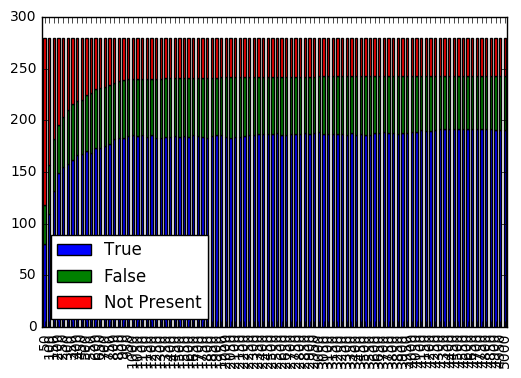

In [208]:
ax1 = df_BSmat.iloc[:,0:3].plot.bar(stacked=True)
ax1.set_xticklabels(np.unique([df_BSmat.Hand]))

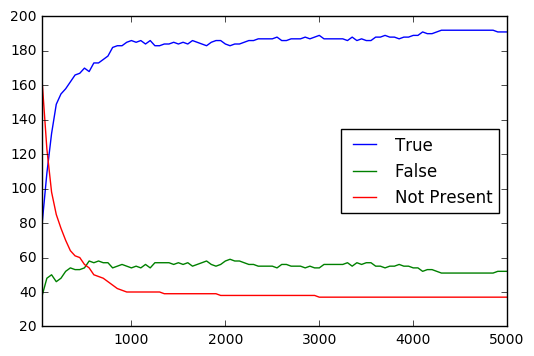

In [209]:
ax1 = df_BSmat.iloc[:,0:3].plot.line()

In [210]:
df_BSmat

,True,False,Not Present,Hand
50,80,38,162,50
100,109,48,123,100
150,132,50,98,150
200,149,46,85,200
250,155,48,77,250
300,158,52,70,300
350,162,54,64,350
400,166,53,61,400
450,167,53,60,450
500,170,54,56,500


In [ ]:
ax = sns.barplot(x="", y="total_bill", data=tips)

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#Read in data & create total column
df_BSmat["total"] = df_BSmat.sum(axis=0)
#df_BSmat = df_BSmat.reset_index()

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.Series1, color = "#0000A3")




In [212]:
def BS_match(df_BSv):

    df_comb = df_BSv.iloc[:,0:4]
    df_comb["Q_action"] = ""
    df_comb["Q_value"] = 0
    df_comb["Total_Tracked_Actions"] = 0
    df_comb["Specific_Tracked_Actions"] = 0
    df_comb["BS_Match"] = False
    df_comb["Status"] = ""


    #correct the Dh and Ds...


    for n1 in range(0,len(df_comb)):
        st_i = (df_comb.loc[n1,'P_Val'],df_comb.loc[n1,'H_S'],df_comb.loc[n1,'D_C'])

        if df_comb.loc[n1,'Action'] == "Dh":
            df_comb.loc[n1,'Action'] = 'H'
        elif df_comb.loc[n1,'Action'] == "Ds":
            df_comb.loc[n1,'Action'] = 'S'


        try:
            TTAc = 0
            vm = -100
            for ki in Q[st_i].keys():
                TTAc += Q[st_i][ki][1]
                vi = Q[st_i][ki][0]
                if vi > vm:
                    act_j = ki
                    vj = vi
                    STAc = Q[st_i][ki][1]
                    vm = vi
        except:
            TTAc = 0
            STAc = 0
            vj = 0
            act_j = "Not Present"
        df_comb.loc[n1,'Q_action'] = act_j
        df_comb.loc[n1,'Q_value']  = vj
        df_comb.loc[n1,'Total_Tracked_Actions'] = TTAc
        df_comb.loc[n1,'Specific_Tracked_Actions'] = STAc

        df_comb.loc[n1,'BS_Match'] = df_comb.loc[n1,'Action'] == df_comb.loc[n1,'Q_action']

        if act_j == "Not Present":
            status = act_j
        else:
            status = str(df_comb.loc[n1,'Action'] == df_comb.loc[n1,'Q_action'])

        df_comb.loc[n1,'Status']= status


    return df_comb[["Status",'Q_action']].groupby('Status').count().reset_index(), df_comb



#dict to df_BS

In [112]:
A

,Status,Q_action,Hand
0,False,66,200
1,Not Present,75,200
2,True,139,200


In [118]:
B.to_dict(orient='records')

[{'False': 66, 'Hand': 200, 'Not Present': 75, 'True': 139}]

In [136]:
B = {}
A = BS_match(df_BSv)
A['Hand'] = hn + 1
.update({hn+1:A.pivot(index = 'Hand', columns='Status', values='Q_action').reset_index().to_dict(orient='records')[0]})


In [137]:
B

{200: {'False': 66, 'Hand': 200, 'Not Present': 75, 'True': 139}}

In [125]:
A.pivot(columns='Status',values='Q_action',index='Hand')

Status,False,Not Present,True
Hand,,,
200,66,75,139


In [108]:
B.index.name = None
B

Status,index,Hand,False,Not Present,True
0,0,200,66,75,139


In [104]:
A.pivot(index = 'Hand', columns='Status', values='Q_action').reset_index().reset_index()

Status,index,Hand,False,Not Present,True
0,0,200,66,75,139


In [69]:
A.drop(['Status'],axis = 1)

,Q_action,Hand
0,66,200
1,75,200
2,139,200


In [101]:
B.index.names = ['index']

Status,index,Hand,False,Not Present,True
index,,,,,
0,0,200,66,75,139


In [17]:
np.sum(df_comb["BS_Match"])

0

In [18]:
df_comb.head()

,P_Val,H_S,D_C,Action,Q_action,Q_value,Total_Tracked_Actions,Specific_Tracked_Actions,BS_Match,Status
0,5,Hard,2,H,Not Present,0,0,0,False,Not Present
1,6,Hard,2,H,Not Present,0,0,0,False,Not Present
2,7,Hard,2,H,Not Present,0,0,0,False,Not Present
3,8,Hard,2,H,Not Present,0,0,0,False,Not Present
4,9,Hard,2,H,Not Present,0,0,0,False,Not Present


In [111]:
df_comb[["Status",'Q_action']].groupby('Status').count().reset_index()

,Status,Q_action
0,,280


In [ ]:
(10000 / (3000/ 1148.5)) / 3600.0

In [ ]:
(3600.0 * 8.0) * (50.0 / 150.0)

In [ ]:
(280  * 20) * 10

In [ ]:
#np.save("Q_dict_v2.npy",Q)

In [ ]:
df_Q = pd.DataFrame.from_dict(Q,orient="index").reset_index()
#df_Q

In [ ]:
df_WL_Spread = df_WL_Spread_.reset_index()

#df_WL_Spread_2 = df_WL_Spread_2_.reset_index()

#df_WL_Spread_2['Ratio'] = 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

df_WL_Spread["CC"] = pd.to_numeric(df_WL_Spread['Card_Count'],downcast="float")
df_WL_Spread["CCint"] = pd.to_numeric(df_WL_Spread['Card_Count'],downcast="int")


In [ ]:
df_WL_Spread.head()

In [ ]:
qplot(x="CC",y="Value",geom="smooth",data = df_WL_Spread,color = "Outcome")

# One off update with Basic Strategy 



In [ ]:
qi[act_i][0]

In [ ]:
st_i

In [ ]:
Q1 = np.load('Q_dict_v2.npy').item()
P_act = ['H','S']
G_rew = 15.0
B_rew = -15.0
N_add = 7.0

for st_i in Q1.keys():
    DC_i = st_i[2]
    if DC_i == 11:
        DC_i = 14
    Act_i = BS_St_val(st_i[0],st_i[1],DC_i,df_BSv)
    qi = Q1[st_i]
    for act_i in P_act:
        if act_i == Act_i:
            cnt = qi[act_i][1]
            n_rew = ((qi[act_i][0] * cnt) + (G_rew * N_add))/(cnt + N_add)
            qi.update({act_i:[n_rew,cnt+N_add]})

        else:
            cnt = qi[act_i][1]
            n_rew = ((qi[act_i][0] * cnt) + (B_rew * N_add))/(cnt + N_add)
            qi.update({act_i:[n_rew,cnt+N_add]})
    Q1.update({st_i:qi})
    
np.save("Q_dict_v3_BS.npy",Q1)

In [ ]:
(-45.0 + (-15.0 * 7.0))/8.0

In [ ]:
qi

In [ ]:
df_BSv.columns

In [ ]:
df_BSv[df_BSv['P_Val']==5]

In [ ]:
Acter = df_BSv.loc[(df_BSv["P_Val"] == Val) & (df_BSv["H_S"] == H_S) & (df_BSv["D_C"] == DC_i),"Action"]#.reset_index(drop=True)
Act_i = Acter.iloc[0]

In [ ]:
Q2 = np.load('Q_dict_v3_BS.npy').item()

In [ ]:
Q2

In [ ]:
Val=st_i[0]
H_S=st_i[1]
DC_i=st_i[2]
#BS_St_val(Val,H_S,DC_i,df_BSv)

In [ ]:
States[1]

In [ ]:
Q1[st_i]

In [ ]:
st_i

In [ ]:
BS_St_val (Val, H_S, DC_i, df_BSv)